# Project: Titanic - Machine Learning from Disaster

In [27]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index(train_df.PassengerId, inplace = True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop('PassengerId', axis = 1, inplace = True)

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [10]:
test_df = pd.read_csv('test.csv', index_col="PassengerId")

In [11]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 1. Feature Classification: Categorical vs Numerical

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [14]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [15]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [19]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null category
Pclass      891 non-null category
Name        891 non-null object
Sex         891 non-null category
Age         714 non-null float64
SibSp       891 non-null category
Parch       891 non-null category
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null category
dtypes: category(6), float64(2), object(3)
memory usage: 48.1+ KB


##  Distribution of Numerical feature values across the samples

In [21]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution of Categorical features

In [22]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory Data Analysis (EDA)
### Correlating categorical features
- Categorical: "Survived", "Sex", "Embarked", "Pclass" (ordinal), 'SibSp', 'Parch'
#### Target variable: Survived

In [23]:
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [24]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,Survived
0,0.616162
1,0.383838


### Sex

In [26]:
train_df['Sex'].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


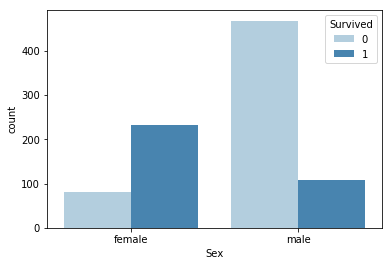

In [32]:
sns.countplot(data=train_df, x="Sex",hue="Survived", palette="Blues")

- Remainning Categorical Feature Columns

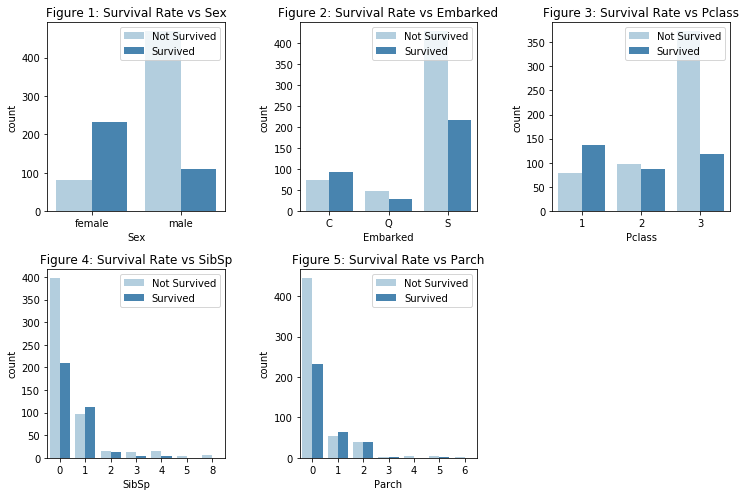

In [37]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols): 
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title = '', loc = "upper right", labels=['Not Survived', 'Survived'])
            
ax.flat[-1].set_visible(False)
plt.tight_layout()

### EDA for Numerical Features (Age , Fare)

### Age

In [ ]:
sns.hisplot(data=train_df, x='Age', bins = 40, kde = True)

### Fare

In [41]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
sns.hisplot(data=train_df, x="Fare", hue="Survived", bins = 40, palette="Blues")

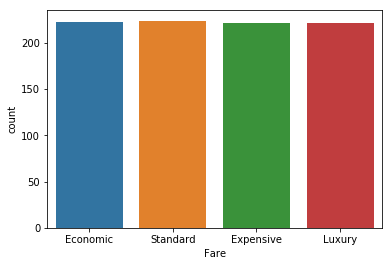

In [47]:
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x = quartile_data)

In [45]:
train_df["Fare"]

PassengerId
1        7.2500
2       71.2833
3        7.9250
4       53.1000
5        8.0500
6        8.4583
7       51.8625
8       21.0750
9       11.1333
10      30.0708
11      16.7000
12      26.5500
13       8.0500
14      31.2750
15       7.8542
16      16.0000
17      29.1250
18      13.0000
19      18.0000
20       7.2250
21      26.0000
22      13.0000
23       8.0292
24      35.5000
25      21.0750
26      31.3875
27       7.2250
28     263.0000
29       7.8792
30       7.8958
         ...   
862     11.5000
863     25.9292
864     69.5500
865     13.0000
866     13.0000
867     13.8583
868     50.4958
869      9.5000
870     11.1333
871      7.8958
872     52.5542
873      5.0000
874      9.0000
875     24.0000
876      7.2250
877      9.8458
878      7.8958
879      7.8958
880     83.1583
881     26.0000
882      7.8958
883     10.5167
884     10.5000
885      7.0500
886     29.1250
887     13.0000
888     30.0000
889     23.4500
890     30.0000
891      7.7500
Name: Fare, 